<a href="https://colab.research.google.com/github/Madhugandha11/GRIP-TheSparksFoundation-Internship-Tasks/blob/main/GRIP_DataScience_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-1:** Predict the percentage of an student based on the no. of study hours

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [16]:
dataset = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [17]:
# Check if there any null value in the Dataset
dataset.isnull == True

False

In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
dataset.shape

(25, 2)

In [5]:
X = dataset.iloc[:, :-1].values
#print(X)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [6]:
Y = dataset.iloc[:,1].values
#print(Y)
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

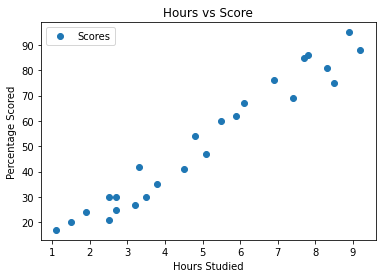

In [7]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Score')
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

**Training the Algorithm:**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


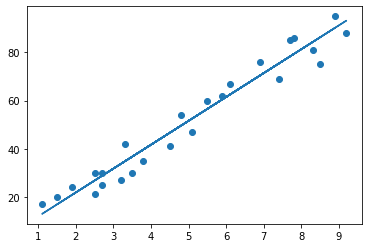

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [11]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visually Comparing the Predicted Marks with the Actual Marks**

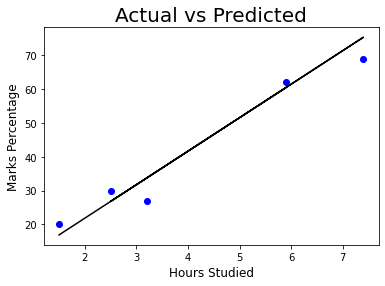

In [22]:
plt.scatter(x=X_test, y=Y_test, color='blue')
plt.plot(X_test, Y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Evaluating the Model**

In [13]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982


What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [19]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

 